In [1]:
import sys
from pathlib import Path

We shoul add the root of the project before import something from scripts folder.

In [2]:
sys.path.append(str(Path(_dh[0]).parent.absolute()))

In [3]:
from scripts.phi_functions import KernelFunctions
from scripts.universal_map import get_feature_map

## Simple Documentation

There are two main things in scripts:
1. KernelFunctions
2. get_feature_map

**KernelFunctions**
ENUM with all the functions from [Original Article](https://arxiv.org/pdf/1906.10467.pdf). This functions have signature:
$$(x_1, x_2) \to \Bigl(\phi(x_1), \phi(x_2), \phi(x_1, x_2)\Bigr)$$

**get_feature_map**
This function get device, kernel and observables as an input and return callable transformation function with the following signature:
$$(\mathbf{X_1}, \mathbf{X_2}) \to \mathbf{Obs}$$

In [13]:
help(get_feature_map)

Help on function get_feature_map in module scripts.universal_map:

get_feature_map(device: pennylane._device.Device, kernel: scripts.phi_functions.KernelFunctions, observables: List[pennylane.operation.Observable]) -> Callable[[numpy.ndarray, numpy.ndarray], numpy.ndarray]
    Generate Feature Map function. Return a function of two NumPy arrays
    that return expected value of observable for each point.
    
    :param device: Device with 2 wires
    :type device: qml.Device
    :param kernel: Kernel function from list of possible variants
    :type kernel: KernelFunctions
    :param observables: List of obervables. Result of the map will be a Observable[0](0) @ Observable[1](1)
    :type observables: List[qml.operation.Observable]
    :rtype: CCallable[[np.ndarray, np.ndarray], np.ndarray]



In [4]:
import pennylane as qml
from pennylane import numpy as np

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Example of using simple $\mathbf{Z}\mathbf{Z}$ feature map:

In [7]:
random_points = np.random.uniform(-1, 1, size=(500, 2))

In [8]:
dev = qml.device("default.qubit", 2)

In [9]:
zz_map = get_feature_map(device=dev, kernel=KernelFunctions.phi8, observables=[qml.PauliZ, qml.PauliZ])

In [10]:
zz_proj = zz_map(random_points[:, 0], random_points[:, 1])

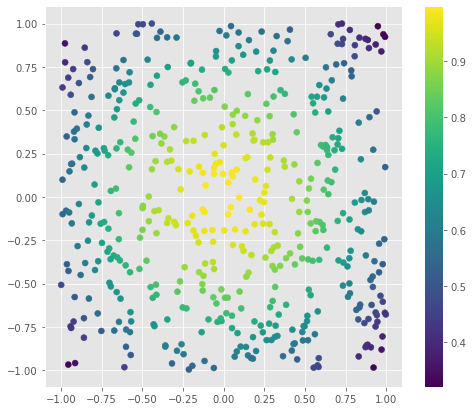

In [12]:
f = plt.figure(figsize=(8, 7))
clbr = plt.scatter(random_points[:, 0], random_points[:, 1], c=zz_proj)
plt.colorbar(clbr)
f.show()